In [9]:
%run init_notebook.py

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Random-Numbers" data-toc-modified-id="Random-Numbers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Numbers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Assignment-1:-Drawing-samples-in-a-loop" data-toc-modified-id="Assignment-1:-Drawing-samples-in-a-loop-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Assignment 1: Drawing samples in a loop</a></span></li></ul></li><li><span><a href="#While-Loops" data-toc-modified-id="While-Loops-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>While Loops</a></span><ul class="toc-item"><li><span><a href="#Assignment-2:-Drawing-samples-in-a-while-loop" data-toc-modified-id="Assignment-2:-Drawing-samples-in-a-while-loop-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Assignment 2: Drawing samples in a while-loop</a></span></li></ul></li><li><span><a href="#Numpy-Arrays" data-toc-modified-id="Numpy-Arrays-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Numpy Arrays</a></span><ul class="toc-item"><li><span><a href="#Assignment-3:-Compound-Interest" data-toc-modified-id="Assignment-3:-Compound-Interest-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Assignment 3: Compound Interest</a></span></li></ul></li></ul></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 3</a></span></li><li><span><a href="#Exercise-4----Hard?" data-toc-modified-id="Exercise-4----Hard?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 4 -- Hard?</a></span></li></ul></div>

# Imports

Python comes with only the most basic primitives programmers need to get started. To do anything interesting, we need to bring in extra code that other people have written. This code comes in "packages". We import packages using the `import` command. All of your Jupyter notebooks will always start with a set of `import` commands. Let's import `numpy`, a popular package for working with data arrays, and `matplotlib.pyplot`, a super customizable package for making graphs.

To over simplify things, `numpy` is Python's version of Matlab.

In [2]:
import numpy as np

Notice that we write `import numpy as np`. "as np" means "give me numpy, but also rename it to np". We do this because it's shorter. You can give it any name you want, but you will find that everyone has agreed on what the short name is "supposed" to be. For numpy, it's np. For matplotlib it's `plt`, so we import that as follows:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Numbers

Generating psuedo-random numbers is an entire subfield of computer science. To get random numbers, we need to set up a "RandomStream", which is an algorithm to generate random numbers. In numpy we do it as follows:

In [4]:
RANDOM_SEED = 42069
rng = np.random.default_rng(RANDOM_SEED)

draw = rng.normal() # the draws change with every execution, but once the kernel has been reset the order of draws will be exactly replicated

`rng` is an object that can do many things. Mostly, it has a bunch of distributions we can sample from. Let's sample 100 values from a standard normal distribution.

In [5]:
# dir shows all available methods of a class
# dir(rng)

In [6]:
#loc means "location", that's mu. "scale" means the standard deviation.
eps_draws = rng.normal(loc=0, scale=1, size=(10000))

We can plot the draws using matplotlib

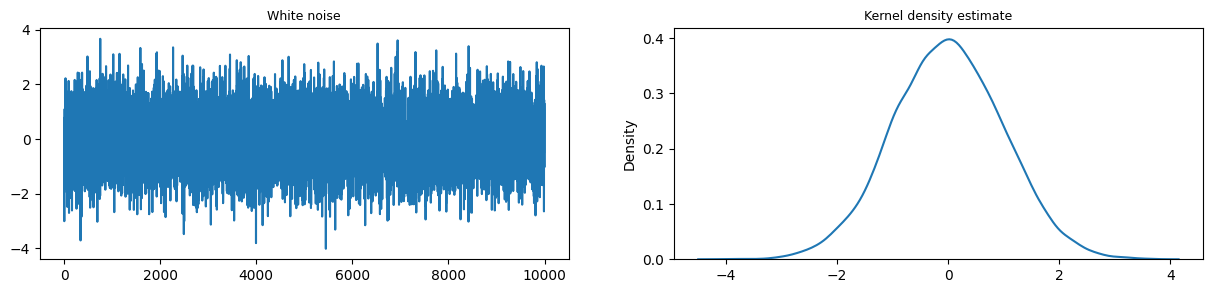

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax[0].set_title('White noise', size=9)
ax[0].plot(eps_draws)

sns.kdeplot(eps_draws, ax=ax[1])
ax[1].set_title('Kernel density estimate', size=9)
plt.show()

### Assignment 1: Drawing samples in a loop
Numpy lets us sample 100 values all at once, but we could also use a loop and a list to sample one-by-one and append the results. Code that up, and plot the results. Use a for-loop, `range`, and the list's `.append` method.

In [8]:
rng.normal(loc=0, scale=1, size=(1))[0]

-0.2006708069552593

In [9]:
n_samples = 100
eps_draws = []
### your code here
for i in range(0, n_samples):
    eps_draws.extend(rng.normal(loc=0, scale=1, size=(1)))

# plt.hist(eps_draws);

## While Loops

Another type of loop is a while loop. Whereas a for-loop goes through a fixed list of items, a while-loop goes until some condition is met. Here is a loop that draws samples from a uniform distribution over (0, 1), and stops when it gets a draw between 0.5 and 0.6. This also highlights how to use inequalities.

In [10]:
n_draws = 0
draw_value = 0
while (draw_value > 0.6) or (draw_value < 0.5):
    draw_value = rng.uniform()
    n_draws += 1
    
print(f'It took {n_draws} to get a value between 0.6 and 0.5')

It took 12 to get a value between 0.6 and 0.5


We can also use a while-loop as a poor man's for-loop, by counting up until we reach the length of a list.

In [11]:
animals = ['Cow', 'Duck', 'Giraffe', 'Iguana', 'Panda']
n_animals = len(animals)
i = 0
while i < n_animals:
    print(animals[i])
    i += 1

Cow
Duck
Giraffe
Iguana
Panda


### Assignment 2: Drawing samples in a while-loop

Use a while-loop that counts up to `n_samples` to draw 100 samples from a standard normal distribution. Plot the results.

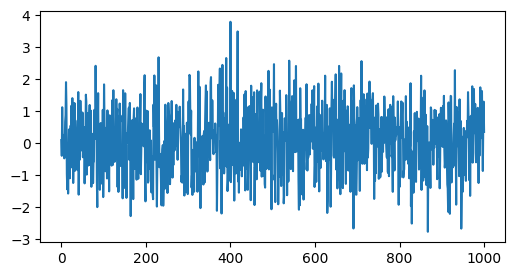

In [12]:
### your code here
i = 0
eps_draws = []
n_draws = 1000

while i <= n_draws:
    eps_draws.extend(rng.normal(0, 1, size=(1)))
    i += 1

plt.figure(figsize=(6, 3))
plt.plot(eps_draws);
plt.show()

## Numpy Arrays

The real reason why we want to use numpy is that we want to use use arrays. Arrays are python objects that represent vectors, matrices, and higher dimensional tensors. Unlike lists, that just hold data, arrays are suitable for doing math on.

In [13]:
x_array = np.array([1, 2, 3])
x_list = [1, 2, 3]

Doing math on arrays causes the operations to be applied to every element in the array. You can do anything to arrays, even hand them to funtions like `np.cos`

In [14]:
print(f'Array plus 1: {x_array + 1}')
print(f'Array times 10: {x_array * 10}')
print(f'Array times array: {x_array * x_array}')
print(f'Cosine array: {np.cos(x_array)}')

Array plus 1: [2 3 4]
Array times 10: [10 20 30]
Array times array: [1 4 9]
Cosine array: [ 0.54030231 -0.41614684 -0.9899925 ]


On the other hand, if you try this with lists, you will get some very unexpected results. Addition raises as error:

In [15]:
# x_list + 1

While multiplication duplicates the list!

In [16]:
x_list * 2

[1, 2, 3, 1, 2, 3]

So always make sure you use arrays when you're planning to do math. You can convert a list to an array using `np.array`:

In [17]:
np.array(x_list) * 2

array([2, 4, 6])

### Assignment 3: Compound Interest

A bank account with a balance of $B$ recieves a fixed rate of interest $r$. We can model the growth of the balance over time as:

$$B_{t+1} = (1 + r)B_t \tag{1}$$

The task is a follows:

1. Make an empty array, B, with T elements, using `np.empty`
2. Set the first value of B to be some number B_0.
3. Loop from 0 to T, at each step updating the array using equation (1).
4. Plot the bank balance over time.

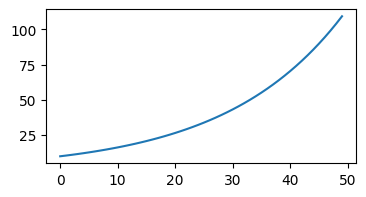

In [18]:
B0 = 10
r = 0.05
T = 50

balance_history = np.empty(T)
balance_history[0] = B0

for t in range(T-1):
    balance_history[t + 1] = balance_history[t] * (1+r)

plt.figure(figsize=(4, 2))
plt.plot(balance_history)
plt.show()

### Your code here

# Exercise 1

Simulate and plot the following AR(1) time series:

$$x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T$$

Assume the shocks $\{\epsilon_t\}$ are i.i.d. normal. Set $\alpha = 0.8$ and T = 200. Plot the results.

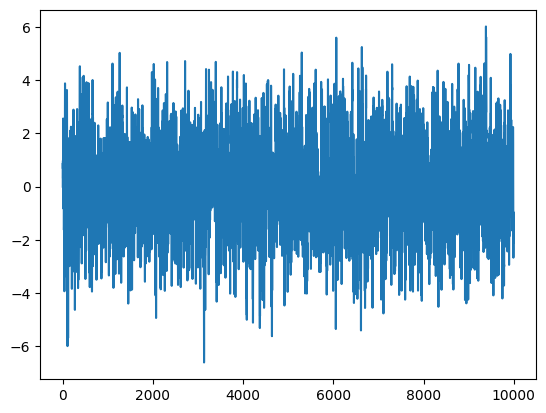

In [21]:
alpha = 0.8
T = 10_000
time_ser = np.empty(T)

### Your code here
for t in range(T-1):
    time_ser[t + 1] = alpha * time_ser[t] + rng.normal()
    
plt.plot(time_ser);

# Exercise 2

Starting with your solution to exercise 1, plot three simulated time series, one for each of the cases $\alpha = 0$, $\alpha=0.8$ and $\alpha = 0.98$.

Use a for-loop to step through the values of $\alpha$.

If you can, add a legend, to help distinguish between the three time series.

Hints:

1. If you call `ax.plot` many times before calling `plt.show()`, all the plots will show up on the same graph.
2. You can get a legend label by adding `label = f''` to `ax.plot`, after the data.
3. To show the legend, call `ax.legend()` before calling `plt.show()`.

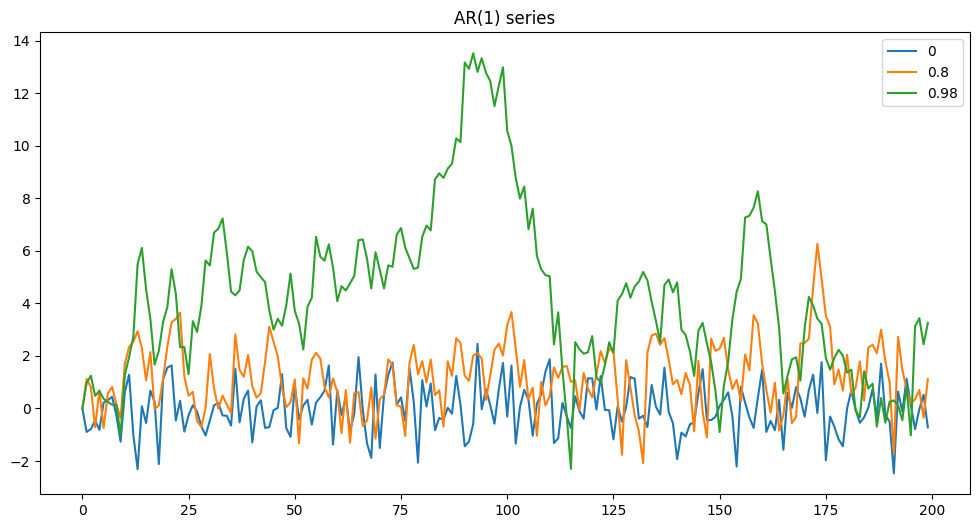

In [52]:
alphas = [0, .8, .98]
T = 200
time_sers = []

### Your code here
fig, ax = plt.subplots(figsize=(12,6))
for alpha in alphas:
    time_ser = np.empty(T)
    for t in range(T-1):
        time_ser[t + 1] = alpha * np.absolute(time_ser[t]) + rng.normal()
    time_sers.append(time_ser)
    ax.plot(time_ser)
ax.legend(alphas)
ax.set(title='AR(1) series');

# Exercise 3

Same as before, plot a trajectory from the following function:

$$x_{t+1} = \alpha \, |x_t| + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,T$$

Use $\alpha = 0.8$ and $T = 200$. Shocks are i.i.d standard normal. For the absolute value, google it.

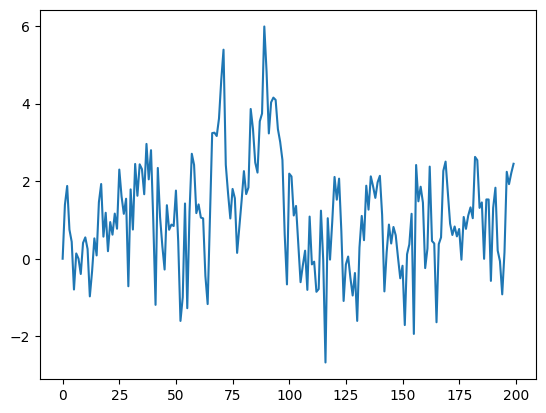

In [54]:
alpha = .8
T = 200
time_ser = np.empty(T)

### Your code here
for t in range(T-1):
    time_ser[t + 1] = alpha * np.absolute(time_ser[t]) + rng.normal()
    
plt.plot(time_ser);

# Exercise 4 -- Hard?

One of the most important techniques in scientific computing is Monte Carlo simulation. It was invented while a bunch of computer scientists at Los Alamos, the site of the Mahatten Project where the first atomic bomb was developed, were waiting for physicts to show up. They couldn't solve complex integrals wihtout the physicists, but they realized they didn't need to solve the integrals. Instead, they could just simulate them a bunch of times and get a good estimate that way.

We want to find the value of $\pi$ by simulation. You will need to do as follows:

1. Sample two points from a unit square (question: what distribtion does this correspond to?)
2. Test whether the sampled point is inside or outside of the unit circle (question: how to determine this?), and save the result.
3. The fraction of inside points to outside is a Monte Carlo estimate of the area of the circle (question: why?). Recover an estimate of $\pi$ from this area estimate.